# Topic: TIME SERIES ANALYSIS FORCASTING REGRESSORS

In [ ]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv('coin_Bitcoin.csv')

In [8]:
df.head(5)

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


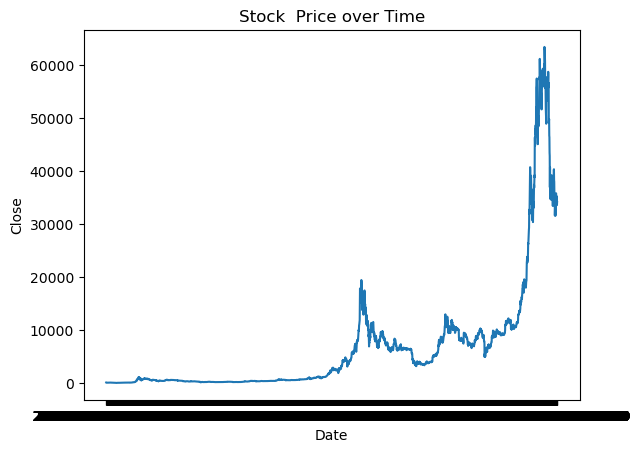

In [22]:
plt.plot(df['Date'],df['Close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Stock  Price over Time')
plt.show()

In [27]:
df['Date'] = pd.to_datetime(df['Date'])

In [29]:
df.head(5)

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [33]:
df['dayofweek'] = df['Date'].dt.dayofweek
df['quarter'] = df['Date'].dt.quarter
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['dayofyear'] = df['Date'].dt.dayofyear
df['sin_day'] = np.sin(df['dayofyear'])
df['cos_day'] = np.cos(df['dayofyear'])

In [35]:
df.head(5)

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,dayofweek,quarter,month,year,dayofyear,sin_day,cos_day
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09,0,2,4,2013,119,-0.371404,0.928471
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09,1,2,4,2013,120,0.580611,0.814181
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09,2,2,5,2013,121,0.998815,-0.048664
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09,3,2,5,2013,122,0.498713,-0.866767
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09,4,2,5,2013,123,-0.459903,-0.887969


In [37]:
df = df.drop(['Date','SNo','Name','Symbol'] , axis=1)

In [39]:
df.head(5)

,High,Low,Open,Close,Volume,Marketcap,dayofweek,quarter,month,year,dayofyear,sin_day,cos_day
0,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09,0,2,4,2013,119,-0.371404,0.928471
1,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09,1,2,4,2013,120,0.580611,0.814181
2,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09,2,2,5,2013,121,0.998815,-0.048664
3,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09,3,2,5,2013,122,0.498713,-0.866767
4,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09,4,2,5,2013,123,-0.459903,-0.887969


In [41]:
df.year.value_counts()

year
2016    366
2020    366
2014    365
2015    365
2017    365
2018    365
2019    365
2013    247
2021    187
Name: count, dtype: int64

In [61]:
df_train = df[df['year']<2020]
X_train = df_train.drop(['Close'], axis=1)
Y_train = df_train['Close']

In [59]:
df_test = df[df['year']>=2020]
X_test = df_test.drop(['Close'], axis=1)
Y_test = df_test['Close']

In [63]:
len(X_train)

2438

In [65]:
len(X_test)

553

In [67]:
X_train.shape, X_test.shape

((2438, 12), (553, 12))

### Random Forest Regressor


In [103]:
reg = RandomForestRegressor(n_estimators=500)
reg.fit(X_train,Y_train)
yhat = reg.predict(X_test)

In [104]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(Y_test,yhat))
print("RMSE", rmse)

RMSE 16544.8311896208


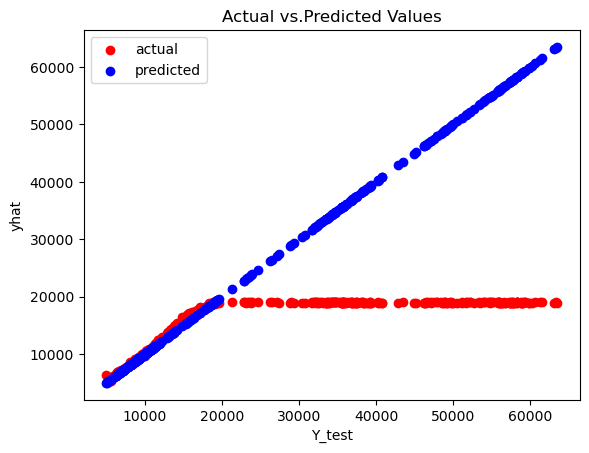

In [105]:
import matplotlib.pyplot as plot

#Scatter plot between Y_test and yhat with custom colors
plt.scatter(Y_test, yhat,color="red",label="actual")
plt.scatter(Y_test, Y_test, color="blue",label="predicted")
plt.xlabel('Y_test')
plt.ylabel('yhat')
plt.title('Actual vs.Predicted Values')
plt.legend()
plt.show()

# Linear Regression Model

In [93]:
reg1 = LinearRegression()
reg1.fit(X_train,Y_train)
yhat1 = reg1.predict(X_test)

In [95]:
from sklearn.metrics import mean_squared_error

rmse1 = np.sqrt(mean_squared_error(Y_test,yhat1))
print("RMSE", rmse1)

RMSE 1386.5948094847154


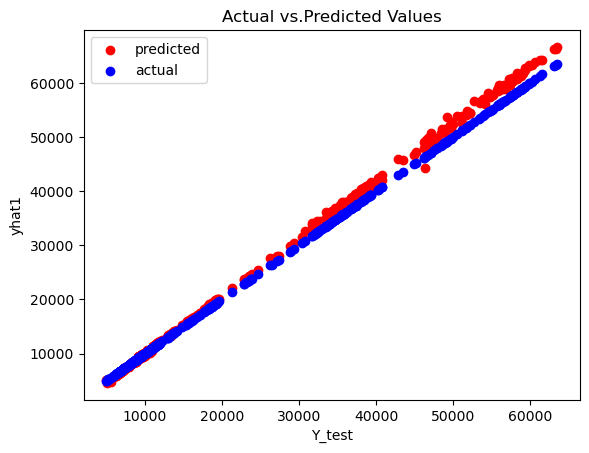

In [101]:
import matplotlib.pyplot as plot

#Scatter plot between Y_test and yhat with custom colors
plt.scatter(Y_test, yhat1,color="red",label="predicted")
plt.scatter(Y_test, Y_test, color="blue",label="actual")
plt.xlabel('Y_test')
plt.ylabel('yhat1')
plt.title('Actual vs.Predicted Values')
plt.legend()
plt.show()